In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#load dataset 
path='/content/drive/MyDrive/ds_heart/heart_disease.csv'
dff=pd.read_csv(path)

dff.head()

,age,sex,cp,testbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [ ]:
#drop samples with missing values
dff.isnull().sum()

age        0
sex        0
cp         0
testbps    0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         4
thal       2
target     0
dtype: int64

In [ ]:
data=dff.dropna()

In [ ]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'testbps', 'chol', 'thalach', 'oldpeak']
data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


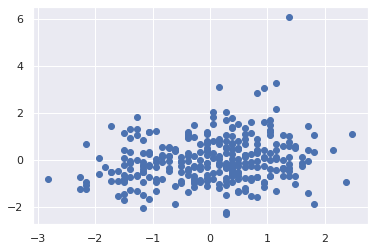

In [ ]:
plt.scatter(data['age'],data['chol'])

plt.show()

In [ ]:
x=data.loc[:,['age','chol']]

In [ ]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [ ]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int3

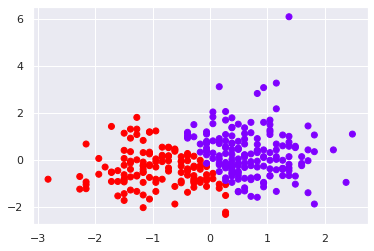

In [ ]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['age'],data_with_clusters['chol'],c=data_with_clusters['Clusters'],cmap='rainbow')

Text(0, 0.5, 'WCSS')

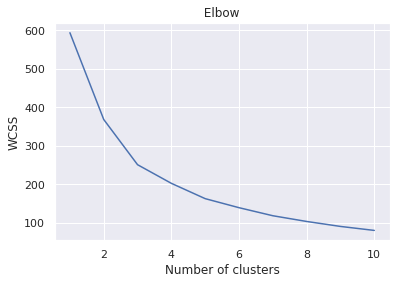

In [ ]:
wcss=[]
for i in range(1,11):
  kmeans= KMeans(i)
  kmeans.fit(x)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,11)
plt.plot(number_clusters,wcss)
plt.title(' Elbow ')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #SSE

In [ ]:
#SSE
mycenters=pd.DataFrame({'Clusters':number_clusters, 'WSS':wcss })
mycenters

,Clusters,WSS
0,1,594.000000
1,2,368.707404
2,3,251.306565
3,4,202.908602
4,5,163.148180
5,6,139.671167
6,7,118.780971
7,8,103.898189
8,9,90.999083
9,10,80.646805


Initialization complete
Iteration 0, inertia 237.52020866740162
Iteration 1, inertia 199.8029429011173
Iteration 2, inertia 186.4431597968113
Iteration 3, inertia 182.51365044127303
Iteration 4, inertia 181.68686904972753
Iteration 5, inertia 180.92419874411337
Iteration 6, inertia 180.5361977692203
Iteration 7, inertia 179.76992340552175
Iteration 8, inertia 178.55622165780147
Iteration 9, inertia 177.23799900458232
Iteration 10, inertia 176.5951349664099
Iteration 11, inertia 175.8536961813498
Iteration 12, inertia 174.68379344791384
Iteration 13, inertia 172.75714283159405
Iteration 14, inertia 171.58678334381432
Iteration 15, inertia 170.32028401223855
Iteration 16, inertia 170.16440224403016
Iteration 17, inertia 170.04658909982948
Iteration 18, inertia 170.00909276657822
Converged at iteration 18: strict convergence.
Initialization complete
Iteration 0, inertia 230.0575609051819
Iteration 1, inertia 187.72282259372753
Iteration 2, inertia 176.97551213238103
Iteration 3, inertia 1

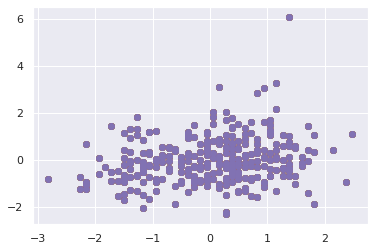

In [ ]:
import matplotlib.pyplot as plt
from numpy import unique, where
model = KMeans(n_clusters=5, verbose=1)

model.fit(x)
yhat = model.predict(x)
clusters = unique(yhat)

for cluster in clusters:
	row_ix = where(yhat == cluster)
	plt.scatter(data_with_clusters['age'],data_with_clusters['chol'],cmap='rainbow')
plt.show()


In [ ]:
#citation: https://www.analyticsvidhya.com/blog/2021/04/k-means-clustering-simplified-in-python/